Datos descargados de: https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?resource=download

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [16]:
data = pd.read_csv('segmentation.csv')
data.head() #.head() me está mostrando solamente las primeras cinco filas

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [17]:
data.drop(columns=['ID'],inplace=True) # No aporta nada la columna ID. Drop me sirve para eliminar una columna que no me aporta nada
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


# EDA:

Analisis univariante de variables numericas:

In [18]:
data[['Age','Income']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2000.0,35.909,11.719402,18.0,27.00,33.0,42.00,76.0
Income,2000.0,120954.419,38108.824679,35832.0,97663.25,115548.5,138072.25,309364.0


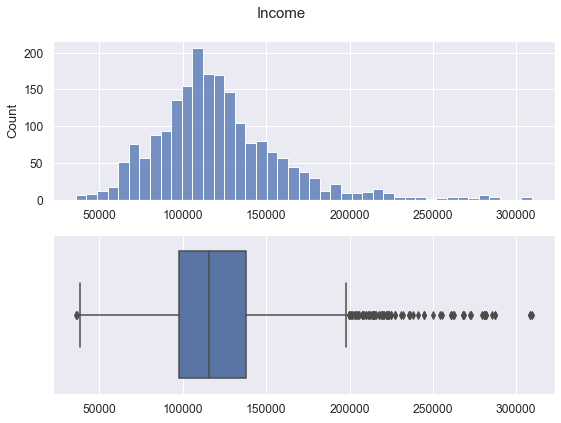

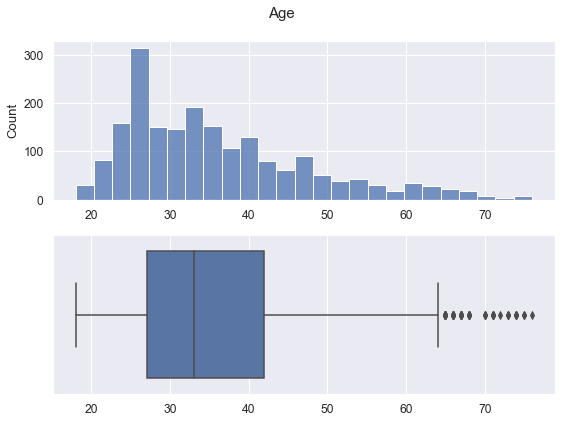

In [19]:
sns.set(font_scale=1.1)
for col in ["Income","Age"]:
    fig,ax = plt.subplots(2,1,figsize=(8,6),tight_layout=True)
    fig.suptitle(col,size=15)
    sns.histplot(x=data[col],ax=ax[0])
    sns.boxplot(x=data[col],ax=ax[1])
    ax[0].set_xlabel("")
    ax[1].set_xlabel("")
    plt.show()

Analisis univariante de variables categoricas:

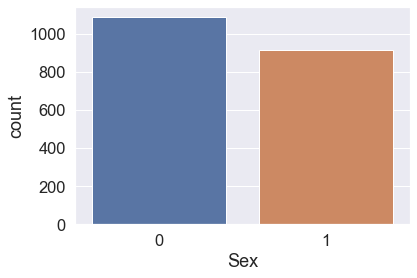

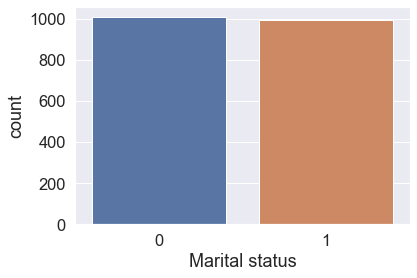

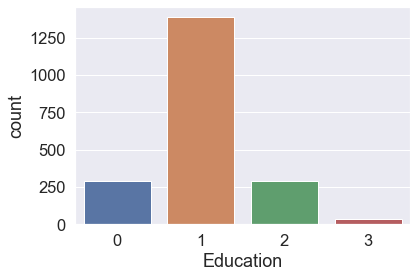

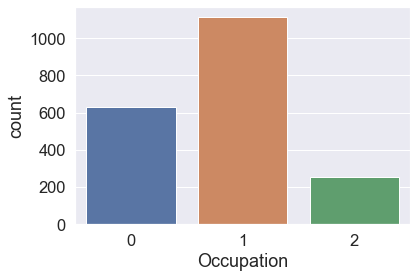

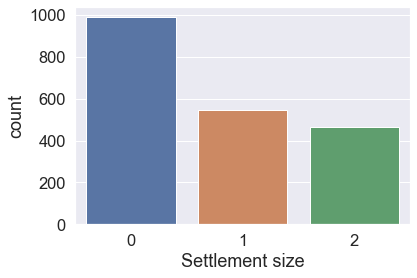

In [20]:
sns.set(rc={"figure.figsize":(6, 4)})
sns.set(font_scale=1.5)
for col in data.columns:
    if col in ["Income","Age"]:
        continue
    sns.countplot(data=data,x=col)
    plt.show()

Analisis bivariante:

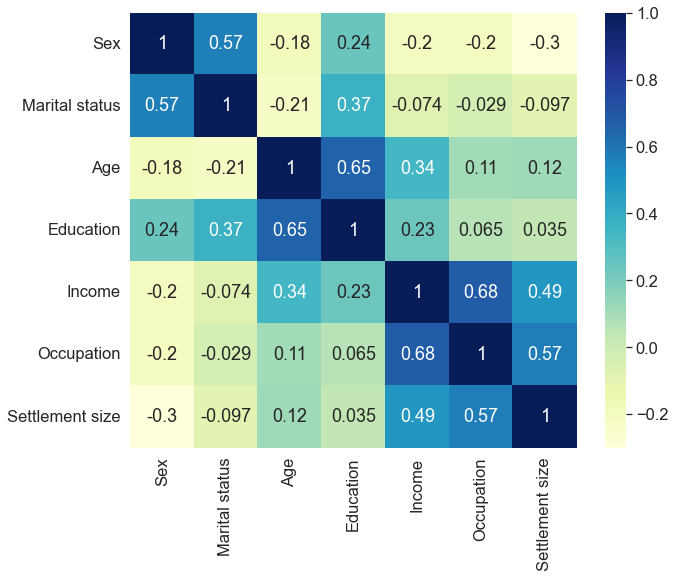

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)#annot es para mostrar los numeros en cada casilla del mapa de calor
plt.show()

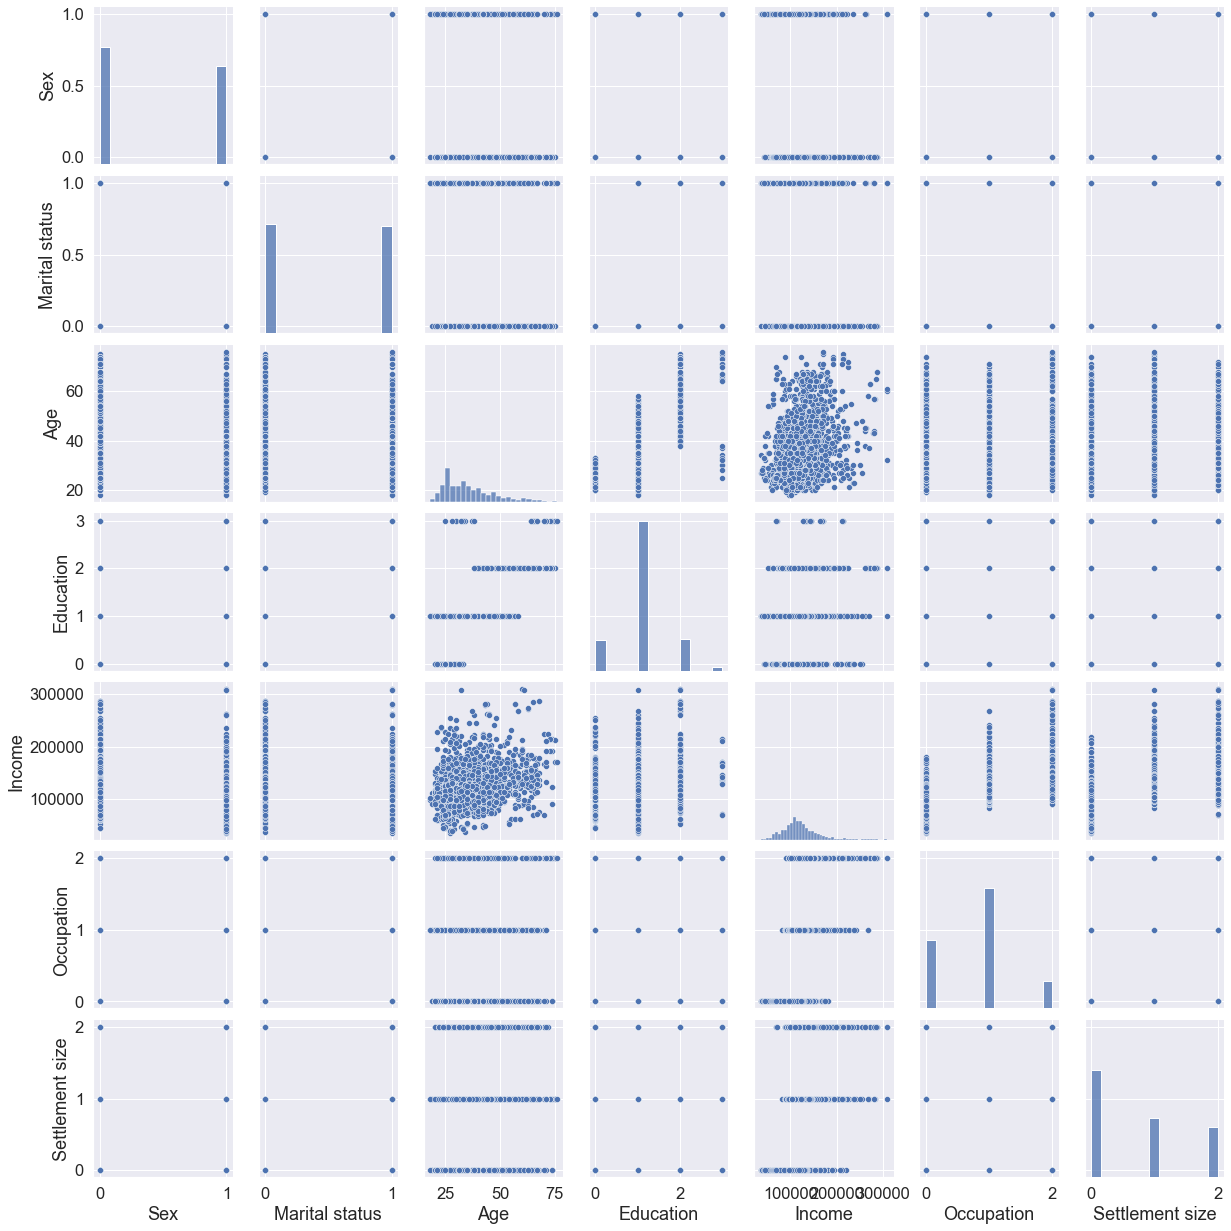

In [22]:
sns.pairplot(data)
plt.show()

# PCA:

In [23]:
data_scaled = MinMaxScaler().fit_transform(data.values)

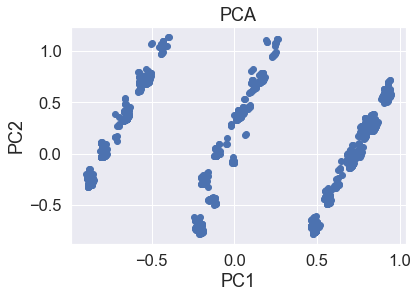

In [24]:
pca = PCA(n_components=2).fit(data_scaled)
pca_projection = pca.transform(data_scaled)
plt.scatter(*pca_projection.T)
plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [29]:
pca_projection

array([[ 0.82608574,  0.35465199],
       [-0.52489089,  0.71629295],
       [ 0.48600855, -0.69066765],
       ...,
       [ 0.49489934, -0.74607966],
       [-0.87582808, -0.28527325],
       [ 0.48311506, -0.76156545]])

# Definir cantidad de clusters:

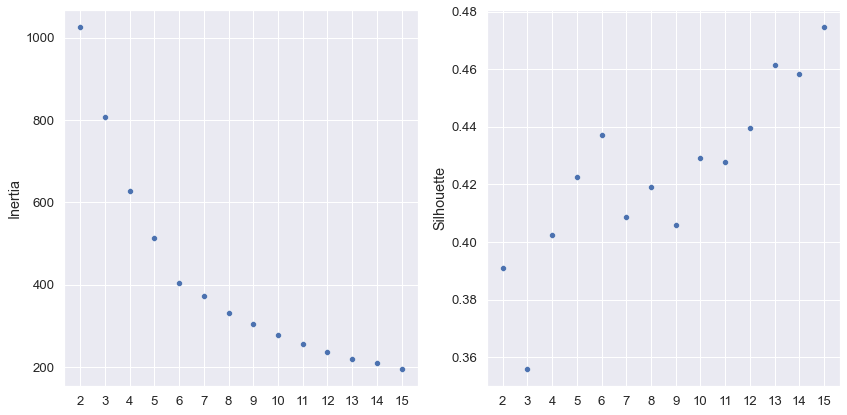

In [25]:
list_silhouette = []#Que tan alejado está un cluster del otro, siempre me devulve valores entre menos uno y una, menos uno es malo
#y 1 es bueno
list_inertia = []# Que tan dispersos están los datos respecto al centro
list_k = list(range(2,16))
for k in list_k:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_scaled)
    list_silhouette.append(silhouette_score(data_scaled,kmeans.labels_))
    list_inertia.append(kmeans.inertia_)

sns.set(rc={"figure.figsize":(12, 6)})
sns.set(font_scale=1.2)
fig,ax = plt.subplots(1,2,tight_layout=True)
sns.scatterplot(x=list_k,y=list_inertia,ax=ax[0])
ax[0].set_ylabel("Inertia")
ax[0].set_xticks(list_k)
sns.scatterplot(x=list_k,y=list_silhouette,ax=ax[1])
ax[1].set_ylabel("Silhouette")
ax[1].set_xticks(list_k)
plt.show()

Los resultados indican que 6 o 7 clusters estaria bien.

# Visualizar resultados:

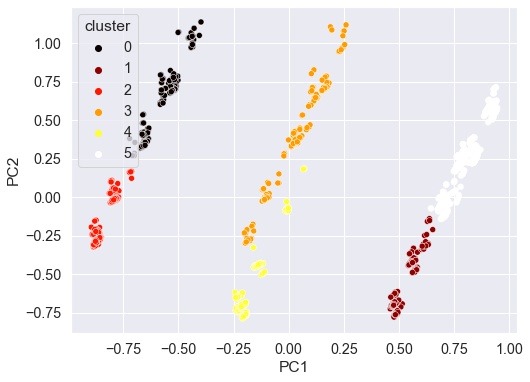

In [26]:
sns.set(rc={"figure.figsize":(8, 6)})
sns.set(font_scale=1.3)

kmeans = KMeans(n_clusters=6, random_state=7).fit(data_scaled)
df_pca = pd.DataFrame(pca_projection,columns = ['PC1','PC2'])
df_pca['cluster'] = kmeans.labels_
sns.scatterplot(data=df_pca,x='PC1',y='PC2',hue='cluster', palette="hot")
plt.show()

In [27]:
data['cluster'] = kmeans.labels_
data.groupby('cluster').mean().round(0).astype(int)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster,,,,,,,
0,1,1,34,1,136537,1,1
1,0,0,38,1,102782,0,0
2,1,1,32,1,102142,0,0
3,0,1,34,1,122977,1,1
4,1,0,35,1,97997,0,0
5,0,0,40,1,145326,1,2


In [28]:
data.groupby('cluster')[['Age','Income']].agg(['mean','std']).round(0).astype(int)

Age      Income       
        mean std    mean    std
cluster                        
0         34  13  136537  38103
1         38  11  102782  26816
2         32  11  102142  25801
3         34  11  122977  38529
4         35  10   97997  21702
5         40  12  145326  38308